In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(20, 10))
plt.style.use('fivethirtyeight')
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\Rathore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Parse Dates is used to proper format the date and passsing time along with it to built datetime stamp

In [3]:
df = pd.read_csv("C:/Users/Rathore/Downloads/Project Datasets/Mate Labs/CalIt2.data",names=['Flow_ID','Date','Time','Count'],parse_dates=[['Date','Time']])

In [4]:
df.head()

,Date_Time,Flow_ID,Count
0,2005-07-24 00:00:00,7,0
1,2005-07-24 00:00:00,9,0
2,2005-07-24 00:30:00,7,1
3,2005-07-24 00:30:00,9,0
4,2005-07-24 01:00:00,7,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 3 columns):
Date_Time    10080 non-null datetime64[ns]
Flow_ID      10080 non-null int64
Count        10080 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 236.3 KB


In [6]:
np.unique(df['Flow_ID'].values)

array([7, 9], dtype=int64)

In [7]:
np.unique(df['Count'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 49, 50, 52, 53,
       54, 55, 61, 62], dtype=int64)

Plotting variation of inflow along with outflow to get idea about variation

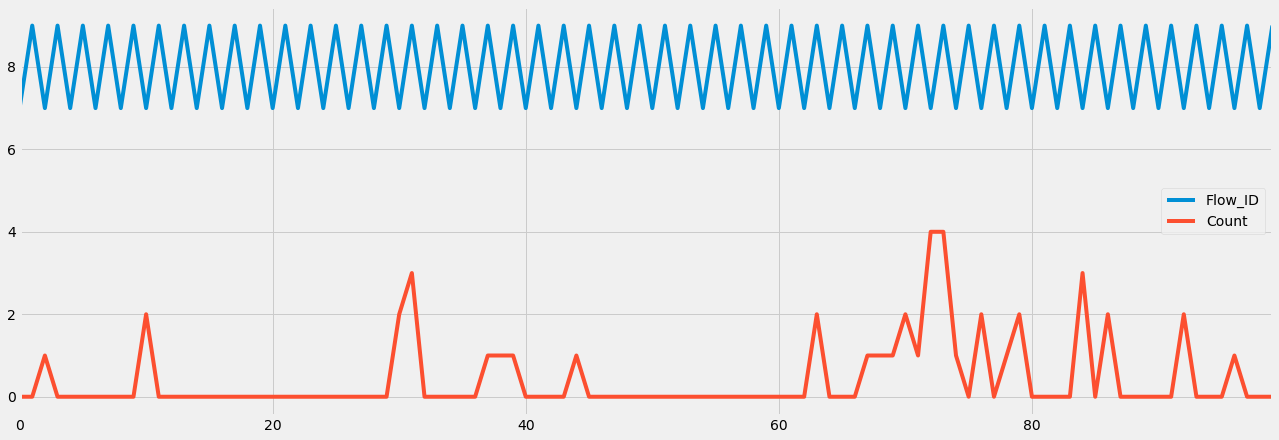

In [65]:
df.iloc[0:100].plot(figsize=(20, 7))
plt.show()


Dividing the dataframe to 2 dataframe......out_flow(only7) and in_flow(only8)

In [9]:
out_flow = df[df.Flow_ID == 7]
out_flow = out_flow.drop('Flow_ID',axis = 1)
true_out = out_flow.Count
out_flow = out_flow.set_index(['Date_Time'])#Setting date_time as index 
out_flow.head()

,Count
Date_Time,
2005-07-24 00:00:00,0
2005-07-24 00:30:00,1
2005-07-24 01:00:00,0
2005-07-24 01:30:00,0
2005-07-24 02:00:00,0


The out_flow curve show that there is normal distribution.

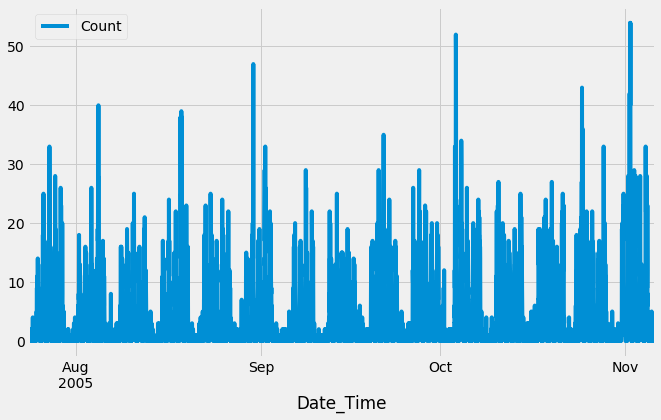

In [10]:
out_flow.plot(figsize=(10, 6))
plt.show()


In [28]:
in_flow = df[df.Flow_ID == 9]
in_flow = in_flow.drop('Flow_ID',axis = 1)
true_in = in_flow.Count
in_flow = in_flow.set_index(['Date_Time'])#Setting date_time as index
in_flow.index

DatetimeIndex(['2005-07-24 00:00:00', '2005-07-24 00:30:00',
               '2005-07-24 01:00:00', '2005-07-24 01:30:00',
               '2005-07-24 02:00:00', '2005-07-24 02:30:00',
               '2005-07-24 03:00:00', '2005-07-24 03:30:00',
               '2005-07-24 04:00:00', '2005-07-24 04:30:00',
               ...
               '2005-11-05 19:00:00', '2005-11-05 19:30:00',
               '2005-11-05 20:00:00', '2005-11-05 20:30:00',
               '2005-11-05 21:00:00', '2005-11-05 21:30:00',
               '2005-11-05 22:00:00', '2005-11-05 22:30:00',
               '2005-11-05 23:00:00', '2005-11-05 23:30:00'],
              dtype='datetime64[ns]', name='Date_Time', length=5040, freq=None)

The in_flow curve show that there is normal distribution.

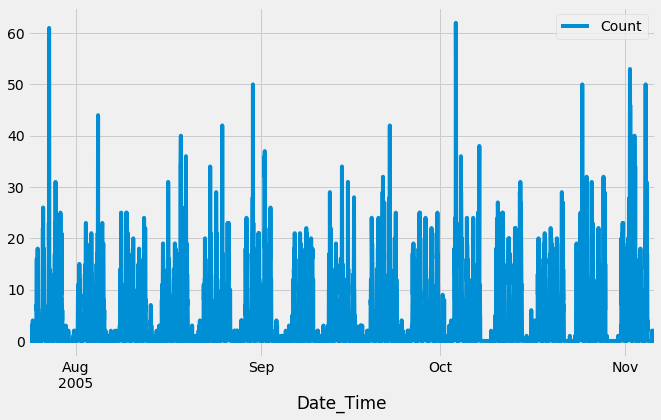

In [12]:
in_flow.plot(figsize=(10, 6))
plt.show()


Building a pure stats model without any machine learning algo to get idea about the difference of in_flow and out_flow

In [13]:
df_ander = in_flow.reset_index()
df_bahar = out_flow.reset_index()

Here I have set differencing criteria to 18 becoz the about plotted curve have avg inflow and outflow =18. so the difference greater than 18 are highly probable of having an event

In [14]:
stat = pd.merge(df_ander,df_bahar,on= "Date_Time")
event = stat[(stat.Count_x - stat.Count_y) >18]
event

,Date_Time,Count_x,Count_y
167,2005-07-27 11:30:00,61,14
258,2005-07-29 09:00:00,25,1
746,2005-08-08 13:00:00,25,6
788,2005-08-09 10:00:00,25,1
1125,2005-08-16 10:30:00,31,8
1126,2005-08-16 11:00:00,25,6
1227,2005-08-18 13:30:00,40,14
1463,2005-08-23 11:30:00,34,12
1511,2005-08-24 11:30:00,29,10
1612,2005-08-26 14:00:00,23,4


#ARIMA_Time-series Model. Here is the start of ARIMA model specifically Seasonal ARIMA(SARIMAX)

In [17]:
# parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection..........Lower the AIC better the model parameters.

In [18]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
min_val = 30000
inflow_params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(in_flow,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if min_val > results.aic:
                min_val = results.aic
                inflow_params.append([param, param_seasonal])
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:33049.58829206127
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:32475.486372970292
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:31857.408831822315
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:31844.130075643792
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:32486.161963010076
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:31546.372298974427
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:32112.820225383915
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:30975.741484059887
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:31742.367387303682
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:31040.309005868556
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:30483.937979383587
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:30413.88646302725
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:31208.503794865483
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:30117.815017683144
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:29537.95948960397
ARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:29497.551227748205
ARIMA(0, 1, 0)x(1, 0, 0, 4)4 - AIC:29542.826314671198
ARIMA(0, 1, 0)x(1, 0, 1, 4)4 - AIC:29539.96129784346
ARIMA(0, 1, 0)x(1, 1, 0, 4)4 - A

The parameters are appended to list in decreasing order, so last parameter will have the lowest AIC value. hence[-1]

In [19]:
print(inflow_params[-1][0],inflow_params[-1][1],min_val)


(1, 0, 1) (0, 1, 1, 4) 28540.991543


ARIMA for in_flow

In [66]:
inflow_model = sm.tsa.statespace.SARIMAX(in_flow,
                                order=inflow_params[-1][0],
                                seasonal_order=inflow_params[-1][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
inflow_results = inflow_model.fit(disp= -1)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.015      3.141      0.002       0.018       0.076
ma.L1         -0.5105      0.013    -37.966      0.000      -0.537      -0.484
ar.S.L4        0.0019      0.008      0.244      0.807      -0.013       0.017
ma.S.L4       -1.0000      0.620     -1.612      0.107      -2.216       0.216
sigma2        15.1214      9.391      1.610      0.107      -3.284      33.527


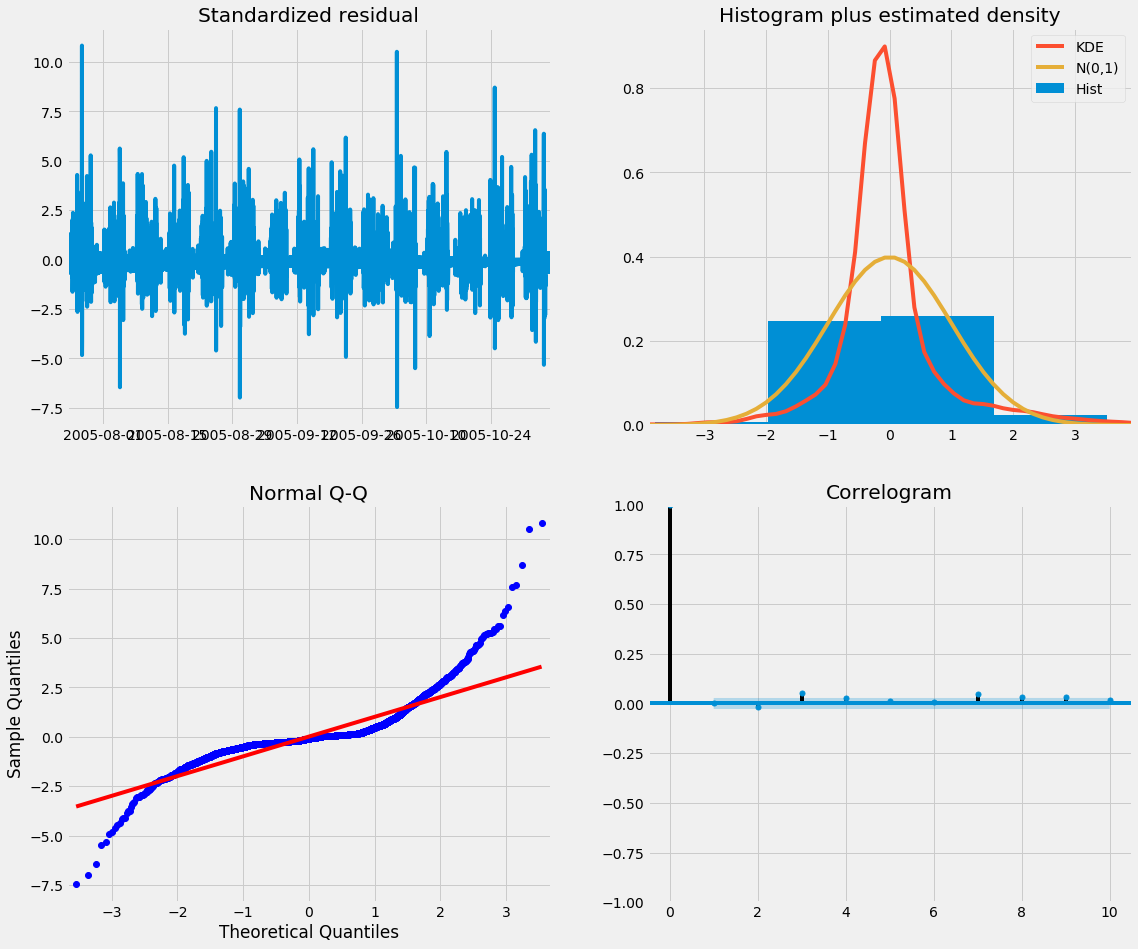

In [67]:
inflow_results.plot_diagnostics(figsize=(17, 15))
plt.show()

Here casting the model to training set to check how accurate model is predicting the in_flow values through mean_squared_error

In [21]:
#Predicting the traininng inflow instances :-
predicted_inflow = list(inflow_results.predict(start =1, end = 5040,dynamic = False))
accuracy = mean_squared_error(true_in,predicted_inflow)
accuracy

3.8185829670830751

ARIMA for out_flow

In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
min_val = 30000
outflow_params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(out_flow,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if min_val > results.aic:
                min_val = results.aic
                outflow_params.append([param, param_seasonal])
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:31949.50579581108
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:31225.54725995995
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:30699.74806866499
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:30667.084361228888
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:31252.746352121438
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:30336.474720852893
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:31259.9401594782
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:30152.84526517117
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:30823.187963747092
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:30023.463906934012
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:29608.112113694388
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:29486.800353743543
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:30213.657402398516
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:29178.26733258868
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:28982.921612109036
ARIMA(0, 1, 0)x(0, 1, 1, 4)4 - AIC:28946.902908441276
ARIMA(0, 1, 0)x(1, 0, 0, 4)4 - AIC:28987.873547359282
ARIMA(0, 1, 0)x(1, 0, 1, 4)4 - AIC:28984.468933679927
ARIMA(0, 1, 0)x(1, 1, 0, 4)4 - AIC:

In [23]:
print(outflow_params[-1][0],outflow_params[-1][1],min_val)

(1, 0, 1) (1, 1, 1, 4) 27764.9322389


In [68]:
outflow_model = sm.tsa.statespace.SARIMAX(out_flow,
                                order=outflow_params[-1][0],
                                seasonal_order=outflow_params[-1][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
outflow_results = outflow_model.fit(disp= -1)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.015      3.141      0.002       0.018       0.076
ma.L1         -0.5105      0.013    -37.966      0.000      -0.537      -0.484
ar.S.L4        0.0019      0.008      0.244      0.807      -0.013       0.017
ma.S.L4       -1.0000      0.620     -1.612      0.107      -2.216       0.216
sigma2        15.1214      9.391      1.610      0.107      -3.284      33.527


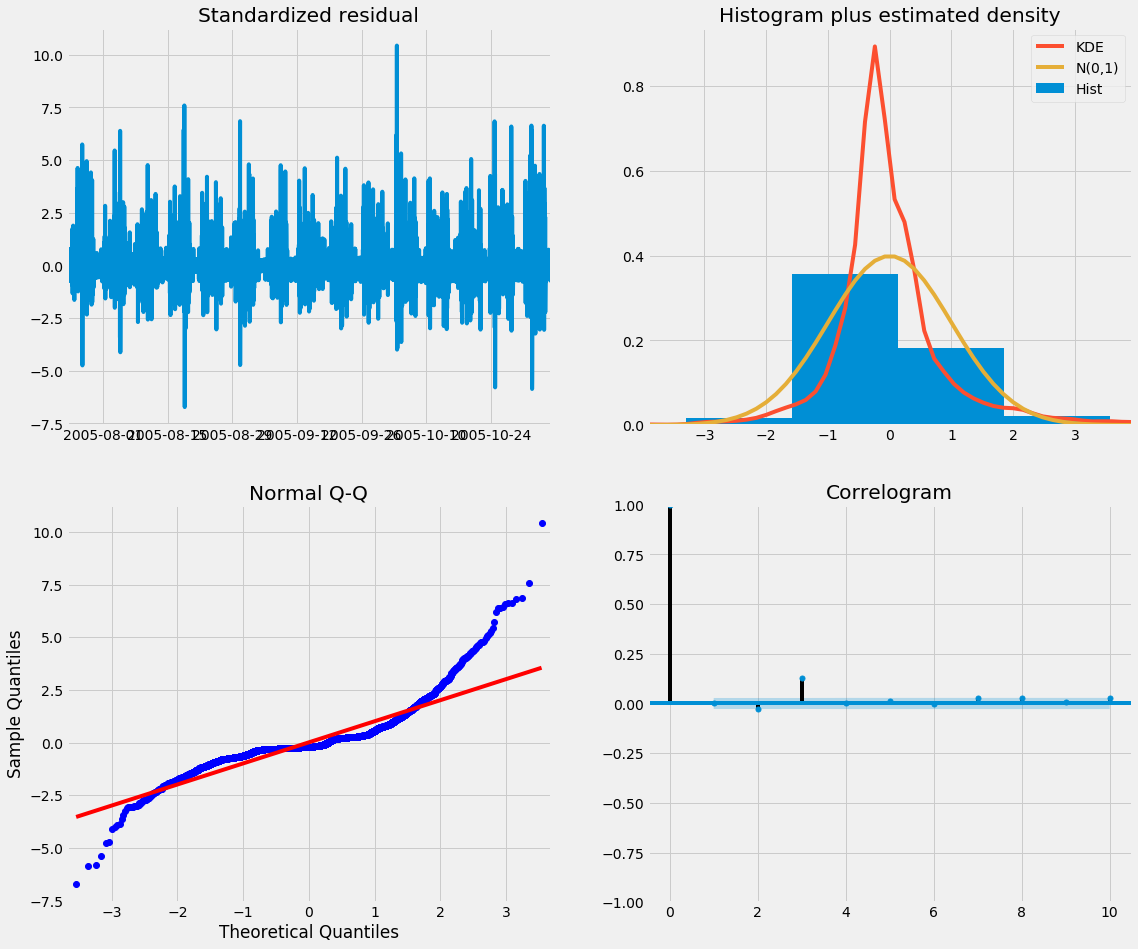

In [69]:
outflow_results.plot_diagnostics(figsize=(17, 15))
plt.show()

Here casting the model to training set to check how accurate model is predicting the in_flow values through mean_squared_error

In [25]:
#Predicting the traininng outflow instances :-
predicted_outflow = list(outflow_results.predict(start =1, end = 5040,dynamic = False))  
accuracy = mean_squared_error(true_out,predicted_outflow)
accuracy


4.0362967976325388

In [29]:
in_flow = in_flow.drop('Count',axis = 1)

In [30]:
in_flow['prected_count_in'] = (predicted_inflow)
in_flow['prected_count_in'] = (in_flow['prected_count_in']).apply(round)


In [31]:
in_df = in_flow.reset_index()
#in_df = new_df[new_df.prected_count_in > 17]
#new_df

In [32]:
out_flow = out_flow.drop('Count',axis = 1)

In [33]:
out_flow['prected_count_in'] = (predicted_outflow)
out_flow['prected_count_in'] = (out_flow['prected_count_in']).apply(round)


In [34]:
out_df = out_flow.reset_index()
#out_df = new_df[new_df.prected_count_in > 17]
# out_df

casted inflow and out_flow and checking the criteria for having an event(certain assumptions as made according to the data visualization)

In [35]:
inout_df = pd.merge(in_df,out_df,on = "Date_Time")
inout_df = inout_df[(inout_df['prected_count_in_x'] - inout_df['prected_count_in_y']) >12]
inout_df

,Date_Time,prected_count_in_x,prected_count_in_y
167,2005-07-27 11:30:00,40,11
258,2005-07-29 09:00:00,18,2
561,2005-08-04 16:30:00,34,21
788,2005-08-09 10:00:00,17,2
931,2005-08-12 09:30:00,18,5
1125,2005-08-16 10:30:00,21,7
1126,2005-08-16 11:00:00,22,6
1227,2005-08-18 13:30:00,34,17
1463,2005-08-23 11:30:00,24,10
1807,2005-08-30 15:30:00,34,15


Automating the forecast according to the date and time you wnat to predict weather there is event at a given time or not

Function which gives the index value of any date given........
try : for index in training data.........
except: for index out of training data........
It forecast when date given is out of training data.........

In [36]:
def datetime_to_index(date_instance):
    date_instance = pd.to_datetime(str(date_instance))
    list_dt = list(in_flow.index)
    
    try:
        return list_dt.index(date_instance)
    except:
        # NOT IN lIST FUTURE DATE
        last_dt = list_dt[-1]
        last_dt_idx = len(list_dt)
        
        date_diff = date_instance - last_dt
        
        new_idx = last_dt_idx + int((date_diff.days*86400 + date_diff.seconds)/1800)
       
        return new_idx

This function takes two timestamps and forecast the inflow and outflow till end timestamp

In [38]:
def _count_list(time_A, time_B):
    index_A = datetime_to_index(time_A)
    index_B = datetime_to_index(time_B)
    
    return inflow_results.predict(start = index_A, end = index_B,dynamic = False), outflow_results.predict(start = index_A, end = index_B,dynamic = False)

Here you can manually set timestamp you want to check or cross validate the event through visualization

Lets check event on 2005-07-27 only one day

In [56]:
inflow_pred, outflow_pred = _count_list('2005-07-27 00:00:00', '2005-07-27 23:59:00')

Plotting the prediction of one day

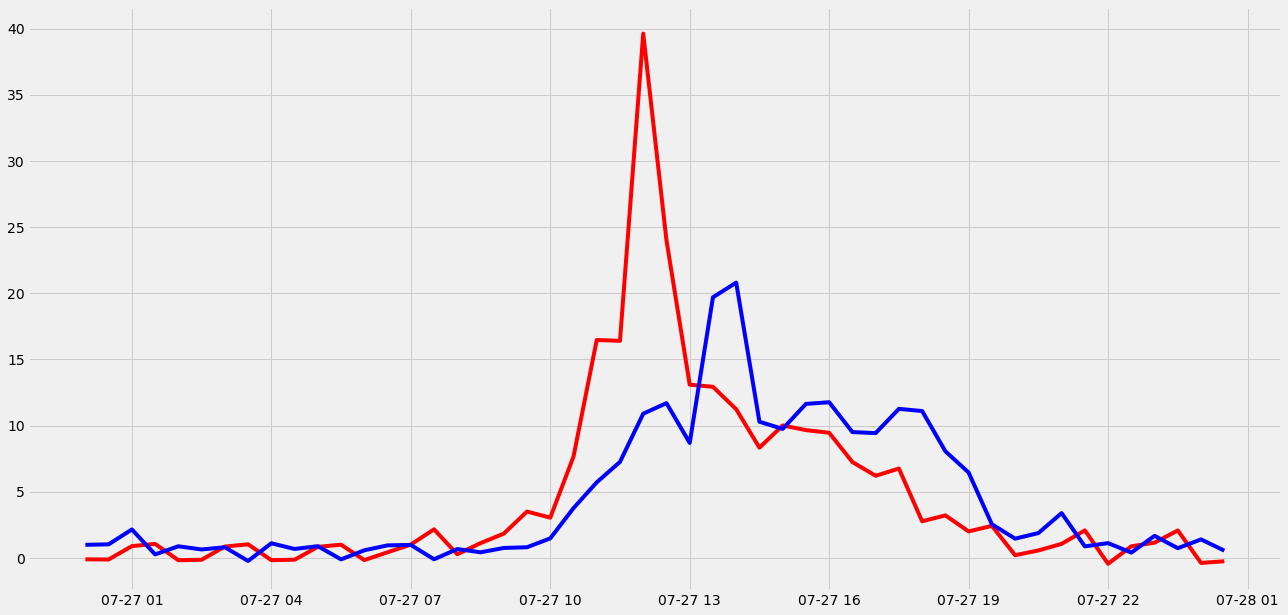

In [57]:
t = inflow_pred.index
a = inflow_pred
b = outflow_pred
plt.plot(t, a, 'r') 
plt.plot(t, b, 'b')


Plotting the actual inflow and outflow of above date

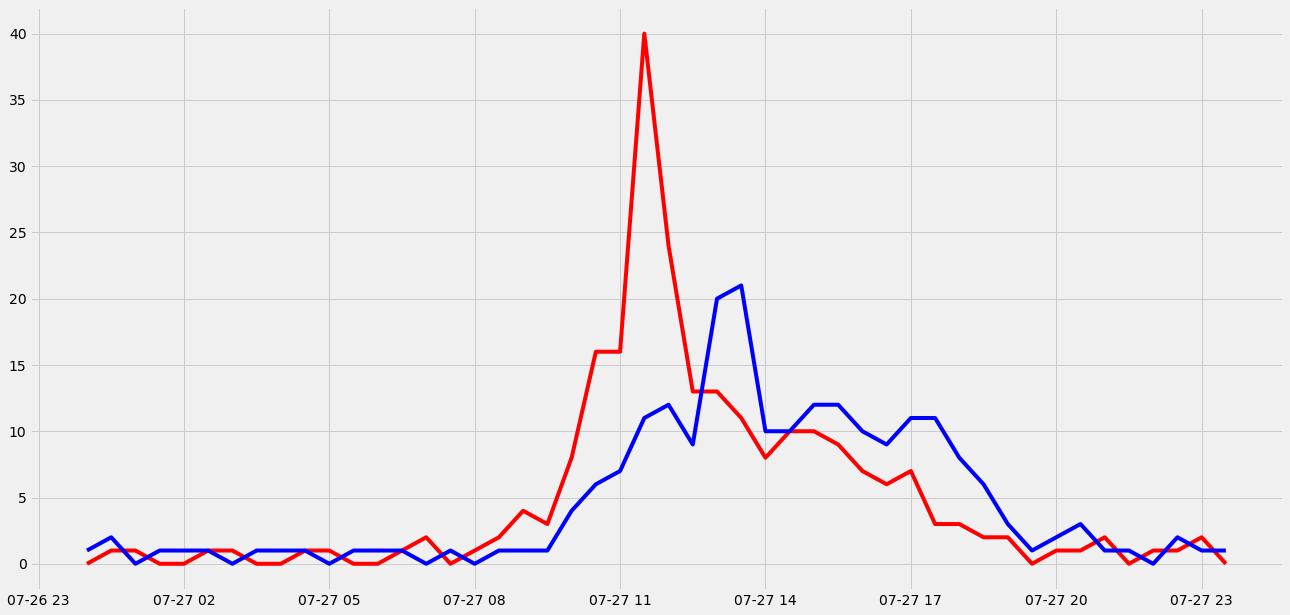

In [58]:
t = in_flow[144:192].index
a = in_flow[144:192]
b = out_flow[144:192]
plt.plot(t, a, 'r') 
plt.plot(t, b, 'b')

Through both graph it is clear that there is a event from 11-13. So model is wroking well.


In [70]:
#in_flow.iloc[144:192]